<a name="ex01"></a>
### Exercise 1

Below, using Keras [Sequential model](https://keras.io/guides/sequential_model/) and [Dense Layer](https://keras.io/api/layers/core_layers/dense/) with a sigmoid activation to construct the network described above.

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import logging
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (60000, 28, 28)
Testing set shape: (10000, 28, 28)


In [3]:
print("The first training example is:", X_train[0])
print("The first training set label is:", y_train[0])

The first training example is: [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18

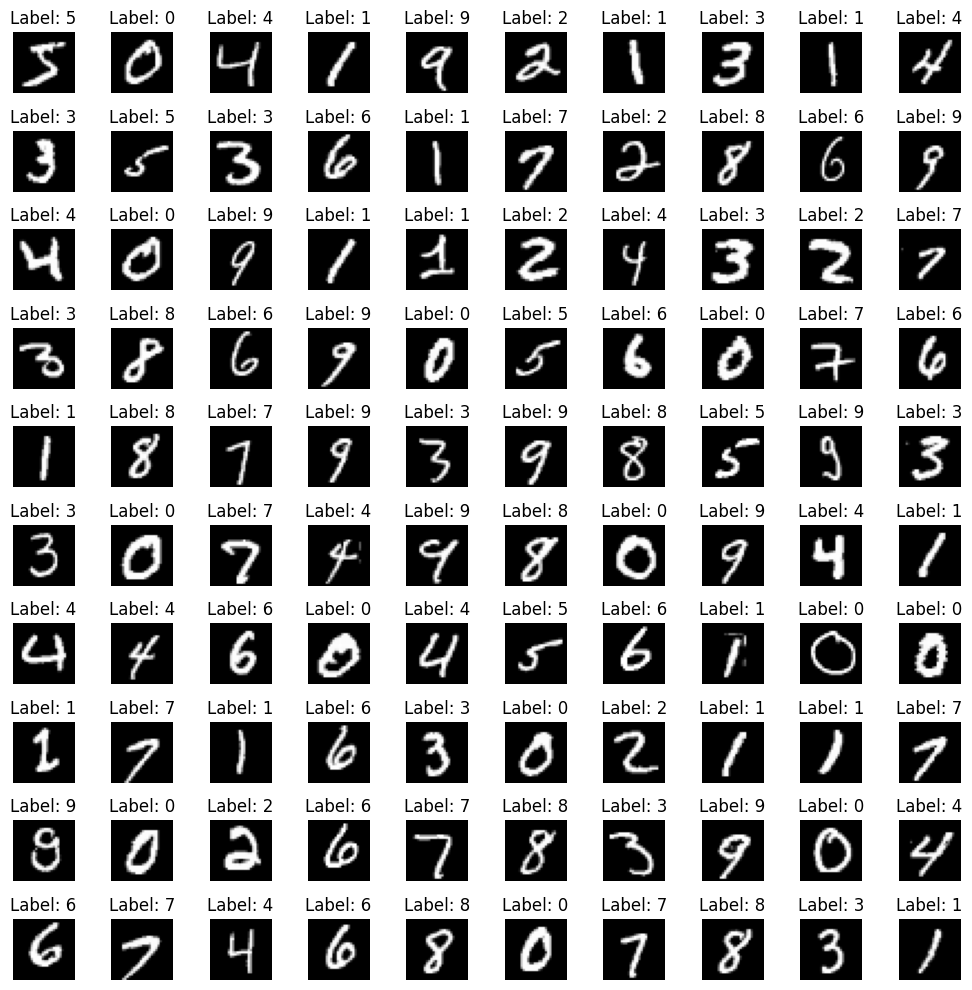

In [4]:
#visualize the first 100 training examples
import matplotlib.pyplot as plt
fig, axes = plt.subplots(10, 10, figsize=(10, 10))
for i in range(10):
    for j in range(10):
        axes[i, j].imshow(X_train[i * 10 + j], cmap='gray')
        axes[i, j].axis('off')
        axes[i, j].set_title(f'Label: {y_train[i * 10 + j]}')
plt.tight_layout()
plt.show()

In [5]:
#using keras sequential and dense layer with sigmoid activation to construct the Network 

model=Sequential(
    [
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')  # Output layer for 10 classees
    ], name="HandwrittenDigitRecognitionModel"
)

c:\Users\Yashk\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
#get model summary
model.summary()

Model: "HandwrittenDigitRecognitionModel"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
#L1 shape = (784, 128) and L2 shape = (128, 10)
L1_num_params=784*128 + 128  # Input layer to first hidden layer
L2_num_params=128*10 + 10  # First hidden layer to output layer
print(f"Number of parameters in L1: {L1_num_params}")
print(f"Number of parameters in L2: {L2_num_params}")
print(f"Total number of parameters: {L1_num_params + L2_num_params}")

Number of parameters in L1: 100480
Number of parameters in L2: 1290
Total number of parameters: 101770


In [8]:
[layer1, layer2, layer3]=model.layers
#examine the weights shape for the layers
W1, b1 = layer2.get_weights()
W2, b2 = layer3.get_weights()
print("Weights shape for layer 1:", W1.shape)
print("Bias shape for layer 1:", b1.shape)
print("Weights shape for layer 2:", W2.shape)
print("Bias shape for layer 2:", b2.shape)

Weights shape for layer 1: (784, 128)
Bias shape for layer 1: (128,)
Weights shape for layer 2: (128, 10)
Bias shape for layer 2: (10,)


In [9]:
#calculate loss function and gradient descent
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8044 - loss: 8.6806 - val_accuracy: 0.8803 - val_loss: 0.5453
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8941 - loss: 0.4753 - val_accuracy: 0.9105 - val_loss: 0.4027
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9205 - loss: 0.3270 - val_accuracy: 0.9258 - val_loss: 0.2929
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9338 - loss: 0.2565 - val_accuracy: 0.9356 - val_loss: 0.2862
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9407 - loss: 0.2328 - val_accuracy: 0.9386 - val_loss: 0.2807
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9265 - loss: 0.2970  
Test Loss: 0.27502933144569397, Test Accuracy: 0.9359999895095825


In [10]:
#making a prediction
predictions = model.predict(X_test[:5])
for i, prediction in enumerate(predictions):
    predicted_label = np.argmax(prediction)
    print(f"Test example {i+1}: Predicted label: {predicted_label}, True label: {y_test[i]}")
# Save the model
model.save('handwritten_digit_recognition_model.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Test example 1: Predicted label: 7, True label: 7
Test example 2: Predicted label: 2, True label: 2
Test example 3: Predicted label: 1, True label: 1
Test example 4: Predicted label: 0, True label: 0
Test example 5: Predicted label: 4, True label: 4


In [11]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image

# 1. Read in grayscale and resize using PIL
img = Image.open('D:\\Downloads\\my_image.jpg').convert("L").resize((28, 28))

# Optional: Invert colors if the digit is black-on-white (like MNIST)
img = Image.eval(img, lambda x: 255 - x)

# Convert to NumPy array and normalize
img_array = np.array(img).astype("float32") / 255.0

# Add batch dimension: shape should be (1, 28, 28)
img_array = np.expand_dims(img_array, axis=0)

# 3. Predict
prediction = model.predict(img_array)
predicted_label = np.argmax(prediction)

# 4. Show results
print("Predicted digit:", predicted_label)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Predicted digit: 8


<a name="2.5"></a>
### Exercise 2 (Forward Prop in NumPy)
As described in lecture, it is possible to build your own dense layer using NumPy. This can then be utilized to build a multi-layer neural network. 

In [12]:
#creating a custom dense layer
def my_dense(a_in,W,b,g):
    """
    Computes dense layer
    Args:
      a_in (ndarray (n, )) : Data, 1 example 
      W    (ndarray (n,j)) : Weight matrix, n features per unit, j units
      b    (ndarray (j, )) : bias vector, j units  
      g    activation function (e.g. sigmoid, relu..)
    Returns
      a_out (ndarray (j,))  : j units
    """
    units=W.shape[1] #number of columns in W
    a_out=np.zeros(units) #initialize output
    for j  in range(units):
        w=W[:,j]
        z=np.dot(a_in,w)+b[j] #dot product of input and weights plus bias
        a_out[j]=g(z)
    return a_out

In [13]:
def my_softmax(z):
    ez = np.exp(z)              #element-wise exponenial
    sm = ez/np.sum(ez)
    return(sm)

In [14]:
# Quick Check
x_tst = 0.1*np.arange(1,3,1).reshape(2,)  # (1 examples, 2 features)
W_tst = 0.1*np.arange(1,7,1).reshape(2,3) # (2 input features, 3 output features)
b_tst = 0.1*np.arange(1,4,1).reshape(3,)  # (3 features)
A_tst = my_dense(x_tst, W_tst, b_tst, my_softmax)
print(A_tst)

[1. 1. 1.]


In [15]:
def flatten(x):
    return x.reshape(-1)


In [16]:
def my_relu(z):
    return np.maximum(0,z)

In [20]:
#create the sequential model using the custom dense layer
def my_sequential(X,W1,b1,W2,b2):
    """
    Computes sequential model
    Args:
      X (ndarray (n, m)) : Data, n examples, m features
      W1 (ndarray (m, h1)) : Weights for first layer, m features, h1 units
      b1 (ndarray (h1, )) : Bias for first layer, h1 units
      W2 (ndarray (h1, h2)) : Weights for second layer, h1 units, h2 units
      b2 (ndarray (h2, )) : Bias for second layer, h2 units
      W3 (ndarray (h2, o)) : Weights for output layer, h2 units, o classes
      b3 (ndarray (o, )) : Bias for output layer, o classes
    Returns:
      A_out (ndarray (n, o)) : Output of the model for n examples and o classes
    """
    A1 = my_dense(X, W1, b1, my_relu)
    A2 = my_dense(A1, W2, b2, lambda z: z)  # No activation for the output layer
    return my_softmax(A2)

In [21]:
#COPY THE WEIGHTS FROM THE KERAS MODEL TO THE CUSTOM MODEL
W1_tmp,b1_tmp = layer2.get_weights()
W2_tmp,b2_tmp = layer3.get_weights()

In [27]:
#make predictions using the custom model
for i in range(X_test.shape[0]):
    x = flatten(X_test[i])            
    y_true = y_test[i]
    custom_pred = np.argmax(my_sequential(x, W1_tmp, b1_tmp, W2_tmp, b2_tmp))
    print(f"Test example {i+1}, Custom: {custom_pred}, True: {y_true}")




Test example 1, Custom: 7, True: 7
Test example 2, Custom: 2, True: 2
Test example 3, Custom: 1, True: 1
Test example 4, Custom: 0, True: 0
Test example 5, Custom: 4, True: 4
Test example 6, Custom: 1, True: 1
Test example 7, Custom: 4, True: 4
Test example 8, Custom: 9, True: 9
Test example 9, Custom: 6, True: 5
Test example 10, Custom: 9, True: 9
Test example 11, Custom: 0, True: 0
Test example 12, Custom: 6, True: 6
Test example 13, Custom: 9, True: 9
Test example 14, Custom: 0, True: 0
Test example 15, Custom: 1, True: 1
Test example 16, Custom: 5, True: 5
Test example 17, Custom: 9, True: 9
Test example 18, Custom: 7, True: 7
Test example 19, Custom: 3, True: 3
Test example 20, Custom: 4, True: 4
Test example 21, Custom: 9, True: 9
Test example 22, Custom: 6, True: 6
Test example 23, Custom: 6, True: 6
Test example 24, Custom: 5, True: 5
Test example 25, Custom: 4, True: 4
Test example 26, Custom: 0, True: 0
Test example 27, Custom: 7, True: 7
Test example 28, Custom: 4, True: 4
T

In [31]:
#calculate accuracy for the custom model
def calculate_accuracy(X, y, W1, b1, W2, b2):
    correct_predictions = 0
    for i in range(X.shape[0]):
        x = flatten(X[i])
        y_true = y[i]
        custom_pred = np.argmax(my_sequential(x, W1, b1, W2, b2))
        if custom_pred == y_true:
            correct_predictions += 1
    accuracy = (correct_predictions / X.shape[0])*100
    return accuracy
print("Training_accuracy for custom model",calculate_accuracy(X_train, y_train, W1_tmp, b1_tmp, W2_tmp, b2_tmp),"%")
print("Testing_accuracy for custom model",calculate_accuracy(X_test, y_test, W1_tmp, b1_tmp, W2_tmp, b2_tmp),"%")

Training_accuracy for custom model 94.11333333333334 %
Testing_accuracy for custom model 93.60000000000001 %


<a name="2.6"></a>
### Exercise 3 Vectorized implementation(Optional)
The optional lectures described vector and matrix operations that can be used to speed the calculations.
Below describes a layer operation that computes the output for all units in a layer on a given input example:

We can demonstrate this using the examples `X` and the `W1`,`b1` parameters above. We use `np.matmul` to perform the matrix multiply. Note, the dimensions of x and W must be compatible as shown in the diagram above.

In [45]:
# UNQ_C3
# UNGRADED FUNCTION: my_dense_v

def my_dense_v(A_in, W, b, g):
    """
    Computes dense layer
    Args:
      A_in (ndarray (m,n)) : Data, m examples, n features each
      W    (ndarray (n,j)) : Weight matrix, n features per unit, j units
      b    (ndarray (1,j)) : bias vector, j units  
      g    activation function (e.g. sigmoid, relu..)
    Returns
      A_out (tf.Tensor or ndarray (m,j)) : m examples, j units
    """
### START CODE HERE ### 
    Z = np.matmul(A_in, W) + b   # shape: (m, j)
    A_out = g(Z)
    return(A_out)
### END CODE HERE ### 

In [47]:
def my_sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [48]:
X_tst = 0.1*np.arange(1,9,1).reshape(4,2) # (4 examples, 2 features)
W_tst = 0.1*np.arange(1,7,1).reshape(2,3) # (2 input features, 3 output features)
b_tst = 0.1*np.arange(1,4,1).reshape(1,3) # (1,3 features)
A_tst = my_dense_v(X_tst, W_tst, b_tst, my_sigmoid)
print(A_tst)

[[0.54735762 0.57932425 0.61063923]
 [0.57199613 0.61301418 0.65248946]
 [0.5962827  0.64565631 0.6921095 ]
 [0.62010643 0.67699586 0.72908792]]


In [49]:
#create the sequential model using the custom dense layer
def my_sequential_v(X,W1,b1,W2,b2):
    """
    Computes sequential model
    Args:
      X (ndarray (n, m)) : Data, n examples, m features
      W1 (ndarray (m, h1)) : Weights for first layer, m features, h1 units
      b1 (ndarray (h1, )) : Bias for first layer, h1 units
      W2 (ndarray (h1, h2)) : Weights for second layer, h1 units, h2 units
      b2 (ndarray (h2, )) : Bias for second layer, h2 units
      W3 (ndarray (h2, o)) : Weights for output layer, h2 units, o classes
      b3 (ndarray (o, )) : Bias for output layer, o classes
    Returns:
      A_out (ndarray (n, o)) : Output of the model for n examples and o classes
    """
    A1 = my_dense(X, W1, b1, my_relu)
    A2 = my_dense(A1, W2, b2, lambda z: z)  # No activation for the output layer
    return my_softmax(A2)

In [50]:
W1_tmp,b1_tmp = layer2.get_weights()
W2_tmp,b2_tmp = layer3.get_weights()

In [59]:
def compute_accuracy(X, y, W1, b1, W2, b2):
    correct_predictions = 0
    for i in range(X.shape[0]):
        x = flatten(X[i])
        y_true = y[i]
        custom_pred = np.argmax(my_sequential_v(x, W1, b1, W2, b2))
        if custom_pred == y_true:
            correct_predictions += 1
    accuracy = (correct_predictions / X.shape[0])*100
    return accuracy
train_accuracy = compute_accuracy(X_train, y_train, W1_tmp, b1_tmp, W2_tmp, b2_tmp)
test_accuracy = compute_accuracy(X_test, y_test, W1_tmp, b1_tmp, W2_tmp, b2_tmp)
print("Training_accuracy for custom model", train_accuracy, "%")
print("Testing_accuracy for custom model", test_accuracy, "%")

Training_accuracy for custom model 94.11333333333334 %
Testing_accuracy for custom model 93.60000000000001 %


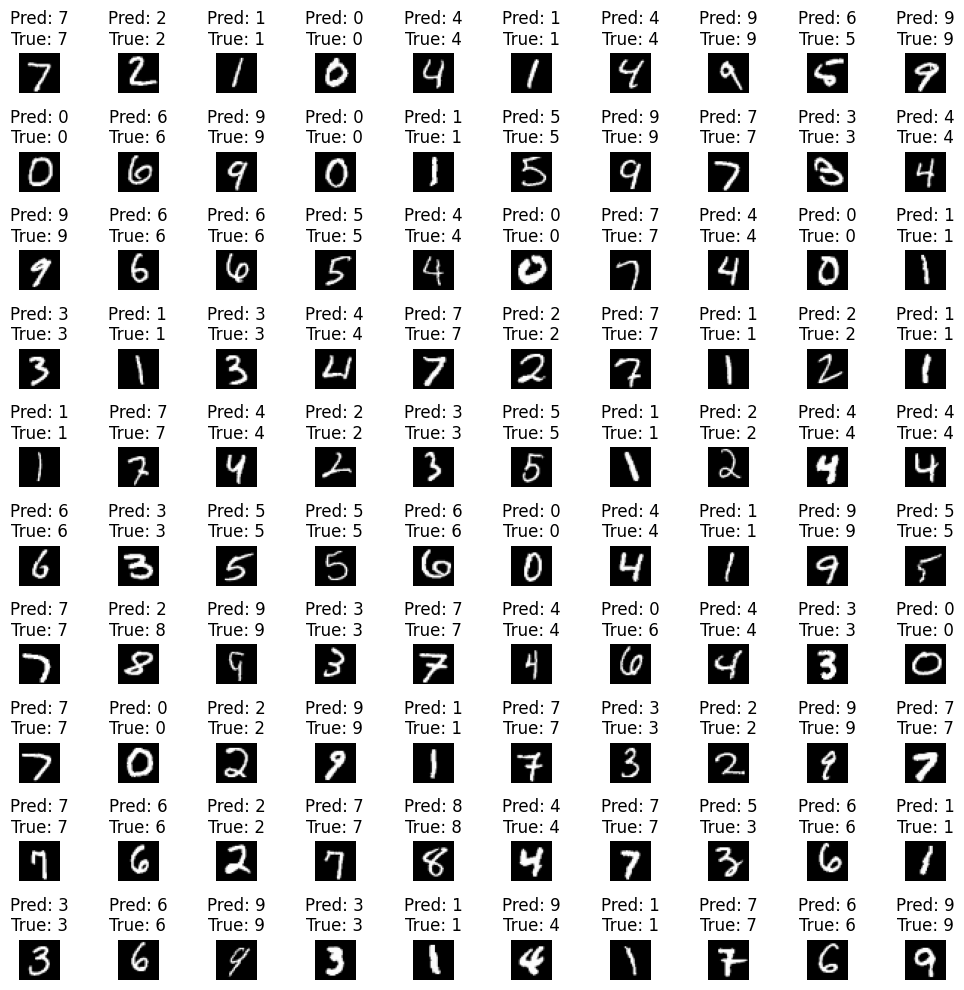

In [57]:
#plot the first 100 predictions
plt.figure(figsize=(10, 10))
for i in range(100):
    plt.subplot(10, 10, i + 1)
    plt.imshow(X_test[i], cmap='gray')
    plt.title(f"Pred: {np.argmax(my_sequential_v(flatten(X_test[i]), W1_tmp, b1_tmp, W2_tmp, b2_tmp))}\nTrue: {y_test[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

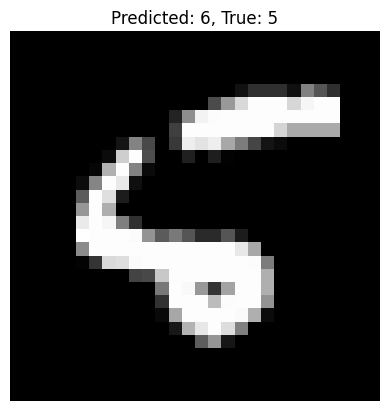

In [58]:
#plot a wrong prediction
wrong_predictions = []
for i in range(X_test.shape[0]):
    x = flatten(X_test[i])
    y_true = y_test[i]
    custom_pred = np.argmax(my_sequential_v(x, W1_tmp, b1_tmp, W2_tmp, b2_tmp))
    if custom_pred != y_true:
        wrong_predictions.append((i, custom_pred, y_true))
if wrong_predictions:
    i, custom_pred, y_true = wrong_predictions[0]  # Take the first wrong prediction
    plt.imshow(X_test[i], cmap='gray')
    plt.title(f"Predicted: {custom_pred}, True: {y_true}")
    plt.axis('off')
    plt.show()

### Exercise 4 CNN implementation of the same handwritten digit recognition model

In [60]:
model_cnn = Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),       
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')  # Output layer for 10 classes
])
model_cnn.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Train the CNN model
model_cnn.fit(X_train.reshape(-1, 28, 28, 1), y_train, epochs=5, batch_size=32, validation_split=0.2)
# Evaluate the CNN model on training set
train_loss_cnn, train_accuracy_cnn = model_cnn.evaluate(X_train.reshape(-1, 28, 28, 1), y_train)
print(f"CNN Training Loss: {train_loss_cnn}, CNN Training Accuracy: {train_accuracy_cnn}")
# Evaluate the CNN model on the test set
test_loss_cnn, test_accuracy_cnn = model_cnn.evaluate(X_test.reshape(-1, 28, 28, 1), y_test)
print(f"CNN Test Loss: {test_loss_cnn}, CNN Test Accuracy: {test_accuracy_cnn}")


Epoch 1/5


c:\Users\Yashk\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.8847 - loss: 1.3609 - val_accuracy: 0.9759 - val_loss: 0.0848
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9821 - loss: 0.0616 - val_accuracy: 0.9801 - val_loss: 0.0715
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.9865 - loss: 0.0444 - val_accuracy: 0.9845 - val_loss: 0.0548
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9878 - loss: 0.0374 - val_accuracy: 0.9874 - val_loss: 0.0470
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.9884 - loss: 0.0356 - val_accuracy: 0.9859 - val_loss: 0.0506
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9943 - loss: 0.0186
CNN Training Loss: 0.023718969896435738, CNN Training Accuracy: 0.9926666617393494
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9842 - loss: 0.0583
CNN Test Loss: 0.04994760826230049, CNN Test Accuracy: 0.986299991607666


In [61]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image

# 1. Read in grayscale and resize using PIL
img = Image.open('D:\\Downloads\\my_image.jpg').convert("L").resize((28, 28))

# Optional: Invert colors if the digit is black-on-white (like MNIST)
img = Image.eval(img, lambda x: 255 - x)

# Convert to NumPy array and normalize
img_array = np.array(img).astype("float32") / 255.0

# Add batch dimension: shape should be (1, 28, 28)
img_array = np.expand_dims(img_array, axis=0)

# 3. Predict
prediction = model_cnn.predict(img_array)
predicted_label = np.argmax(prediction)

# 4. Show results
print("Predicted digit:", predicted_label)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Predicted digit: 1


In [63]:
#make predictions using the CNN model
for i in range(20):
    x = X_test[i].reshape(1, 28, 28, 1)  # Reshape for CNN input
    y_true = y_test[i]
    cnn_pred = np.argmax(model_cnn.predict(x))
    print(f"Test example {i+1}, CNN: {cnn_pred}, True: {y_true}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
Test example 1, CNN: 7, True: 7
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Test example 2, CNN: 2, True: 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Test example 3, CNN: 1, True: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Test example 4, CNN: 0, True: 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Test example 5, CNN: 4, True: 4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Test example 6, CNN: 1, True: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Test example 7, CNN: 4, True: 4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Test example 8, CNN: 9, True: 9
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Test example 9, CNN: 5, True: 5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Test example 10, CNN: 9, True: 9
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Test example 11, CNN: 0, True: 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Test example 12, CNN: 6, True: 6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Test example 13, CNN: 9, True: 9
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Test example 14, CNN: 0, True: 0
1/1 ━━━━━━━━━━━

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


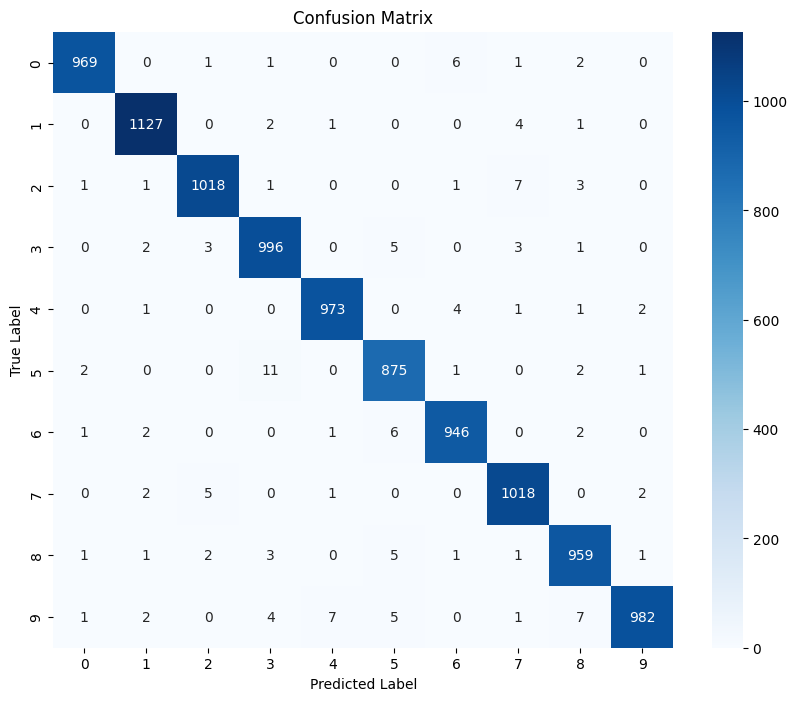

In [64]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Calculate confusion matrix
cm = confusion_matrix(y_test, np.argmax(model_cnn.predict(X_test.reshape(-1, 28, 28, 1)), axis=1))
# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')   
plt.show()